<a href="https://colab.research.google.com/github/hanineji/my-machie_learning-project/blob/main/notebooks/Machine_Learning_Modelli_Neurali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#----Setup---

#---*Procedure di importazione dei moduli e delle librerie*---

In [51]:
import numpy as np
import keras
from keras import Input
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


#---*Parametri*---

In [52]:
num_classes=10
imput_shape=(528,28,1)

#---*Caricamento dataset*---

In [53]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#----*Preprocessing*----

In [54]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/25

#---*Aggiungere la dimensione del canale*---

In [55]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#---*Codifica one-hot delle classi*---

In [56]:
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


---*Definizione modell CNN*---

In [57]:
num_classes = 10
input_shape = (28, 28, 1)
model = Sequential([Input(shape=input_shape),

    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

#---*Compilazione*---

In [58]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#---*Training*---

In [47]:
history=model.fit(x_train,y_train, batch_size=128, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 163s 382ms/step - accuracy: 0.8378 - loss: 0.5184 - val_accuracy: 0.9850 - val_loss: 0.0578
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 189s 351ms/step - accuracy: 0.9716 - loss: 0.0937 - val_accuracy: 0.9870 - val_loss: 0.0445
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 147s 348ms/step - accuracy: 0.9790 - loss: 0.0692 - val_accuracy: 0.9893 - val_loss: 0.0415
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 147s 347ms/step - accuracy: 0.9831 - loss: 0.0534 - val_accuracy: 0.9888 - val_loss: 0.0391
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 146s 347ms/step - accuracy: 0.9857 - loss: 0.0459 - val_accuracy: 0.9902 - val_loss: 0.0381


#---*Valutazione*---

In [48]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Test loss: 0.23705962300300598
Test accuracy: 0.9897000193595886


#---*Salvataggio modello*---

In [49]:
import os

# crea la cartella "models" se non esiste già
os.makedirs("models", exist_ok=True)

# salva il modello nella cartella
model.save("models/mnist_cnn.keras")



#---*Visualizzare il grafico con matplotlib*---

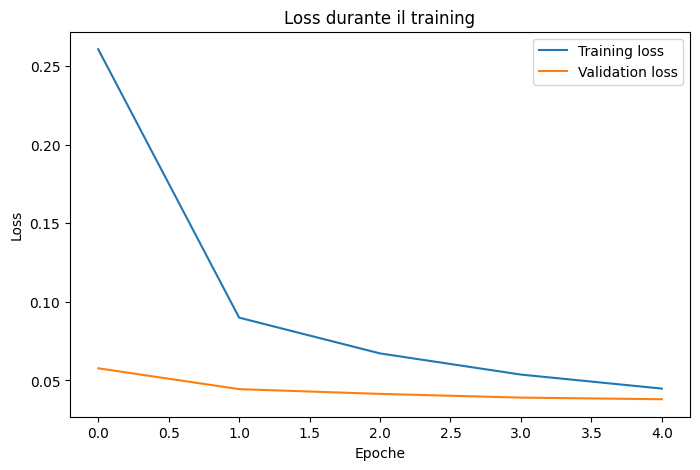

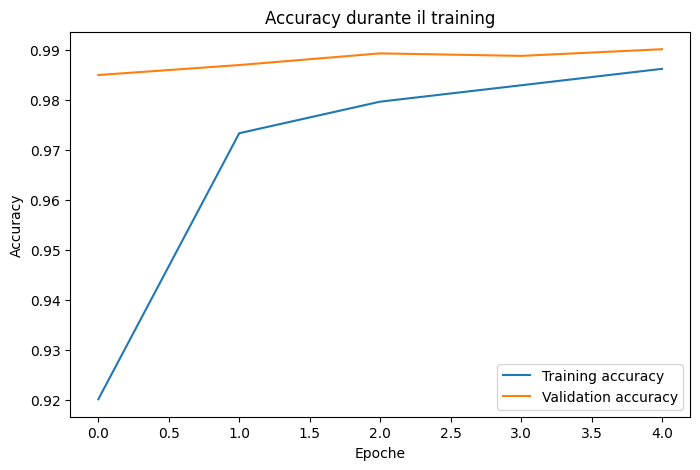

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss durante il training')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy durante il training')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
